In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [3]:
survey_raw_df

Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0       NaN         13  Monthly        NaN            NaN             Germany   
1       NaN         19      NaN        NaN            NaN      United Kingdom   
2       NaN         15      NaN        NaN            NaN  Russian Federation   
3      25.0         18      NaN        NaN            NaN             Albania   
4      31.0         16      NaN        NaN            NaN       United States   
...     ...        ...      ...        ...            ...                 ...   
64456   NaN         16      NaN        NaN            NaN       United States   
64457   NaN        NaN      NaN        NaN            NaN             Morocco   
64458   NaN        NaN      NaN        NaN            NaN            Viet Nam   
64459   NaN        NaN      NaN        NaN            NaN              Poland   
64460   NaN        NaN      NaN        NaN            NaN               Spain   

         CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0       European Euro  ...  Neither easy nor difficult  Appropriate in length   
1      Pound sterling  ...                         NaN                    NaN   
2                 NaN  ...  Neither easy nor difficult  Appropriate in length   
3        Albanian lek  ...                         NaN                    NaN   
4                 NaN  ...                        Easy              Too short   
...               ...  ...                         ...                    ...   
64456             NaN  ...                         NaN                    NaN   
64457             NaN  ...                         NaN                    NaN   
64458             NaN  ...                         NaN                    NaN   
64459             NaN  ...                         NaN                    NaN   
64460             NaN  ...                         NaN                    NaN   

      Trans                                     UndergradMajor  \
0        No  Computer science, computer engineering, or sof...   
1       NaN  Computer science, computer engineering, or sof...   
2       NaN                                                NaN   
3        No  Computer science, computer engineering, or sof...   
4        No  Computer science, computer engineering, or sof...   
...     ...                                                ...   
64456   NaN  Computer science, computer engineering, or sof...   
64457   NaN                                                NaN   
64458   NaN                                                NaN   
64459   NaN                                                NaN   
64460   NaN  Computer science, computer engineering, or sof...   

            WebframeDesireNextYear                      WebframeWorkedWith  \
0                     ASP.NET Core                    ASP.NET;ASP.NET Core   
1                              NaN                                     NaN   
2                              NaN                           

In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema_df = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText
schema_df

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [6]:
schema_df['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [7]:
selected_columns = [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]


In [8]:
len(selected_columns)

20

In [9]:
survey_df = survey_raw_df[selected_columns].copy()

In [10]:
survey_df

Country   Age Gender  \
0                 Germany   NaN    Man   
1          United Kingdom   NaN    NaN   
2      Russian Federation   NaN    NaN   
3                 Albania  25.0    Man   
4           United States  31.0    Man   
...                   ...   ...    ...   
64456       United States   NaN    NaN   
64457             Morocco   NaN    NaN   
64458            Viet Nam   NaN    NaN   
64459              Poland   NaN    NaN   
64460               Spain   NaN    NaN   

                                               EdLevel  \
0      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                                  NaN   
3      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                ...   
64456  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
64457                                              NaN   
64458                        Primary/elementary school   
64459                                              NaN   
64460       Other doctoral degree (Ph.D., Ed.D., etc.)   

                                          UndergradMajor Hobbyist Age1stCode  \
0      Computer science, computer engineering, or sof...      Yes         13   
1      Computer science, computer engineering, or sof...       No         19   
2                                                    NaN      Yes         15   
3      Computer science, computer engineering, or sof...      Yes         18   
4      Computer science, computer engineering, or sof...      Yes         16   
...                                                  ...      ...        ...   
64456  Computer science, computer engineering, or sof...      Yes         16   
64457                                                NaN      Yes        NaN   
64458                                                NaN      Yes        NaN   
64459                                                NaN      Yes        NaN   
64460  Computer science, computer engineering, or sof...      Yes        NaN   

      YearsCode      YearsCodePro  \
0            36                27   
1             7                 4   
2             4               NaN   
3             7                 4   
4            15                 8   
...         ...               ...   
64456        10  Less than 1 year   
64457       NaN               NaN   
64458       NaN               NaN   
64459       NaN               NaN   
64460       NaN               NaN   

                                      LanguageWorkedWith  \
0                                 C#;HTML/CSS;JavaScript   
1                                       JavaScript;Swift   
2                               Objective-C;Python;Swift   
3                                                    NaN   
4                                      HTML/CSS;Ruby;SQL   
...                                                  ...   
64456                                                NaN   
64457  Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...   
64458                                                NaN   
64459                                           HTML/CSS   
64460                    C#;HTML/CSS;Java;JavaScript;SQL   

                                  LanguageDesireNextYear       NEWLearn  \
0                                 C#;HTML/CSS;JavaScript    Once a year   
1                                           Python;Swift    Once a year   
2                               Objective-C;Python;Swift  Once a decade   
3                                                    NaN    Once a year   
4                                        Java;Ruby;Scala    Once a year   
...                                                  ...            ...   
64456                                                NaN  Once a decade   
64457  Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...            NaN   
64458         

In [11]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [12]:
survey_df.isna().sum()

Country                     389
Age                       19015
Gender                    13904
EdLevel                    7030
UndergradMajor            13466
Hobbyist                     45
Age1stCode                 6561
YearsCode                  6777
YearsCodePro              18112
LanguageWorkedWith         7083
LanguageDesireNextYear    10348
NEWLearn                   8305
NEWStuck                   9478
Employment                  607
DevType                   15091
WorkWeekHrs               23310
JobSat                    19267
JobFactors                15112
NEWOvertime               21230
NEWEdImpt                 15996
dtype: int64

In [13]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [14]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [15]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [16]:
survey_df.describe()

Age    Age1stCode     YearsCode  YearsCodePro   WorkWeekHrs
count  45446.000000  57473.000000  56784.000000  44133.000000  41151.000000
mean      30.834111     15.476572     12.782051      8.869667     40.782174
std        9.585392      5.114081      9.490657      7.759961     17.816383
min        1.000000      5.000000      1.000000      1.000000      1.000000
25%       24.000000     12.000000      6.000000      3.000000     40.000000
50%       29.000000     15.000000     10.000000      6.000000     40.000000
75%       35.000000     18.000000     17.000000     12.000000     44.000000
max      279.000000     85.000000     50.000000     50.000000    475.000000

As it is logical that 1 year child as well as 100 year old person can not do the coding so we have to drop those rows..

Additionally, aperson can not work more than 140 hours( 20 hours/day) so we can also drop the rows which is more than 140.

In [17]:
survey_df.drop(survey_df[survey_df.Age<10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age>100].index, inplace = True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace= True)

In [18]:
survey_df.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [19]:
survey_df.Gender.value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

We will not focus on last four genders to make analysis easy and more effective.

In [20]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [21]:
survey_df.Gender.value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [22]:
survey_df.sample(10)

Country   Age Gender  \
47086        Colombia  25.0    Man   
59988          Serbia  22.0    Man   
34615       Indonesia  28.0    Man   
15042       Argentina   NaN    NaN   
23915          Poland  20.0    Man   
45804         Morocco   NaN    Man   
14065           India  18.0    Man   
27981       Argentina   NaN    Man   
12445  United Kingdom  30.0    Man   
40593           India   NaN    NaN   

                                                 EdLevel  \
47086  Some college/university study without earning ...   
59988       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
34615       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
15042  Some college/university study without earning ...   
23915  Secondary school (e.g. American high school, G...   
45804             I never completed any formal education   
14065  Secondary school (e.g. American high school, G...   
27981  Some college/university study without earning ...   
12445                          Primary/elementary school   
40593       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                          UndergradMajor Hobbyist  Age1stCode  \
47086  Computer science, computer engineering, or sof...       No        18.0   
59988  Computer science, computer engineering, or sof...      Yes        19.0   
34615  Information systems, information technology, o...      Yes        16.0   
15042  Information systems, information technology, o...       No        28.0   
23915                                                NaN      Yes        17.0   
45804                                                NaN       No         NaN   
14065                                                NaN      Yes        16.0   
27981  Computer science, computer engineering, or sof...      Yes        17.0   
12445                                                NaN       No        16.0   
40593                                                NaN      Yes        18.0   

       YearsCode  YearsCodePro  \
47086        5.0           NaN   
59988        5.0           NaN   
34615       12.0           2.0   
15042       14.0           6.0   
23915        4.0           1.0   
45804       20.0           NaN   
14065        3.0           NaN   
27981        6.0           3.0   
12445       14.0          14.0   
40593        4.0           3.0   

                                      LanguageWorkedWith  \
47086             C#;HTML/CSS;Java;JavaScript;TypeScript   
59988                         C#;HTML/CSS;Java;PHP;Swift   
34615  Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...   
15042                        HTML/CSS;JavaScript;SQL;VBA   
23915                         C#;HTML/CSS;JavaScript;SQL   
45804                                         C#;SQL;VBA   
14065                    Dart;HTML/CSS;JavaScript;Python   
27981                    Go;JavaScript;Python;TypeScript   
12445                            HTML/CSS;JavaScript;PHP   
40593                                        Objective-C   

                                  LanguageDesireNextYear  \
47086                HTML/CSS;JavaScript;Rust;TypeScript   
59988                                    C#;Python;Swift   
34615  Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...   
15042                                               Dart   
23915              C#;HTML/CSS;JavaScript;SQL;TypeScript   
45804                                   HTML/CSS;SQL;VBA   
14065                    Dart;HTML/CSS;JavaScript;Python   
27981           C++;Go;JavaScript;Python;Rust;TypeScript   
12445                                      C++;Java;Ruby   
40593                                       Python;Swift   

                   NEWLearn  \
47086      Every few months   
59988           Once a year   
34615  Once every few years   
15042           Once a year   
23915           Once a year   
45804      Every few months   
14065      Every few months   
27981      Every few months   
12445  Once every few years   
40593  Once every few years   

   

In [23]:
survey_df.info()
survey_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 64306 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63606 non-null  object 
 1   Age                     45068 non-null  float64
 2   Gender                  50115 non-null  object 
 3   EdLevel                 56981 non-null  object 
 4   UndergradMajor          50619 non-null  object 
 5   Hobbyist                63950 non-null  object 
 6   Age1stCode              57027 non-null  float64
 7   YearsCode               56339 non-null  float64
 8   YearsCodePro            43794 non-null  float64
 9   LanguageWorkedWith      56932 non-null  object 
 10  LanguageDesireNextYear  53688 non-null  object 
 11  NEWLearn                55730 non-null  object 
 12  NEWStuck                54537 non-null  object 
 13  Employment              63394 non-null  object 
 14  DevType                 48983 non-null  obj

Country                     700
Age                       19238
Gender                    14191
EdLevel                    7325
UndergradMajor            13687
Hobbyist                    356
Age1stCode                 7279
YearsCode                  7967
YearsCodePro              20512
LanguageWorkedWith         7374
LanguageDesireNextYear    10618
NEWLearn                   8576
NEWStuck                   9769
Employment                  912
DevType                   15323
WorkWeekHrs               23493
JobSat                    19471
JobFactors                15365
NEWOvertime               21430
NEWEdImpt                 16214
dtype: int64

# Exploratory Analysis and visualization

In [24]:
sns.set_style('darkgrid');
plt.rcParams['font.size'] = 14;
plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['figure.facecolor'] = '#00000000';

## Country

number of countrie in the survey and plotting top 10 countires with the highest number of response

In [25]:
survey_df.Country

0                   Germany
1            United Kingdom
2        Russian Federation
3                   Albania
4             United States
                ...        
64456         United States
64457               Morocco
64458              Viet Nam
64459                Poland
64460                 Spain
Name: Country, Length: 64306, dtype: object

In [26]:
survey_df.Country.nunique()

183

In [27]:
top_countires = survey_df.Country.value_counts().head(15)
top_countires

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

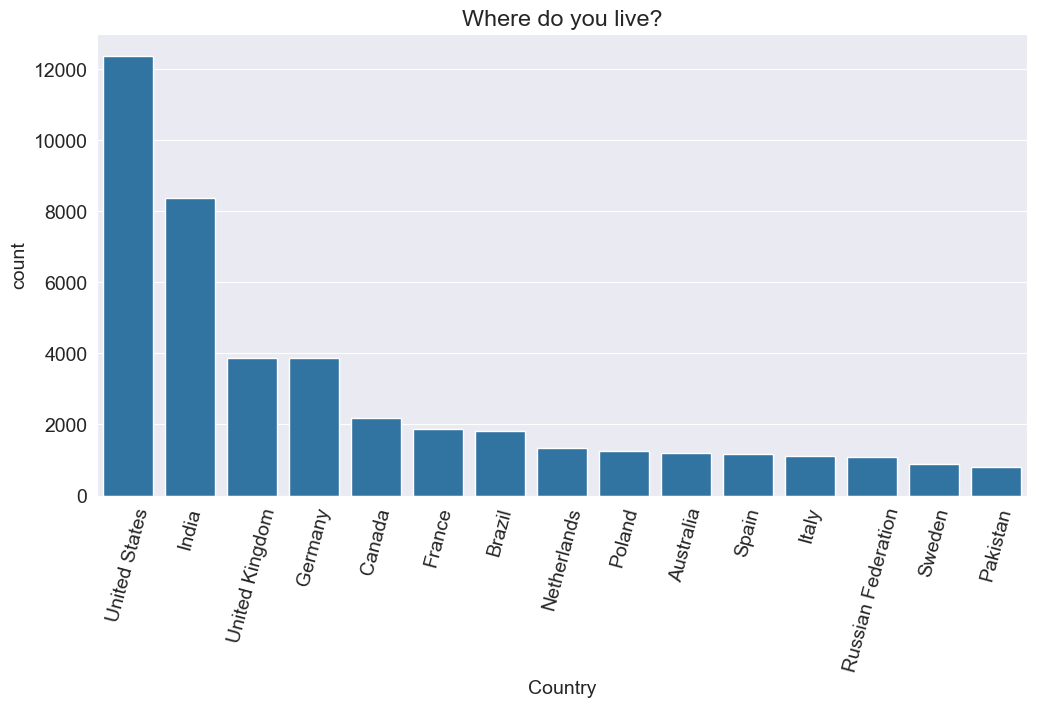

In [28]:
plt.figure(figsize=(12,6));
plt.xticks(rotation = 75);
plt.title(schema_df.Country)
sns.barplot(x= top_countires.index, y= top_countires)

fig = px.bar(data_frame=top_countires, x= top_countires.index, y= top_countires, title=schema_df.Country)
fig.show()

In [29]:
schema_df.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

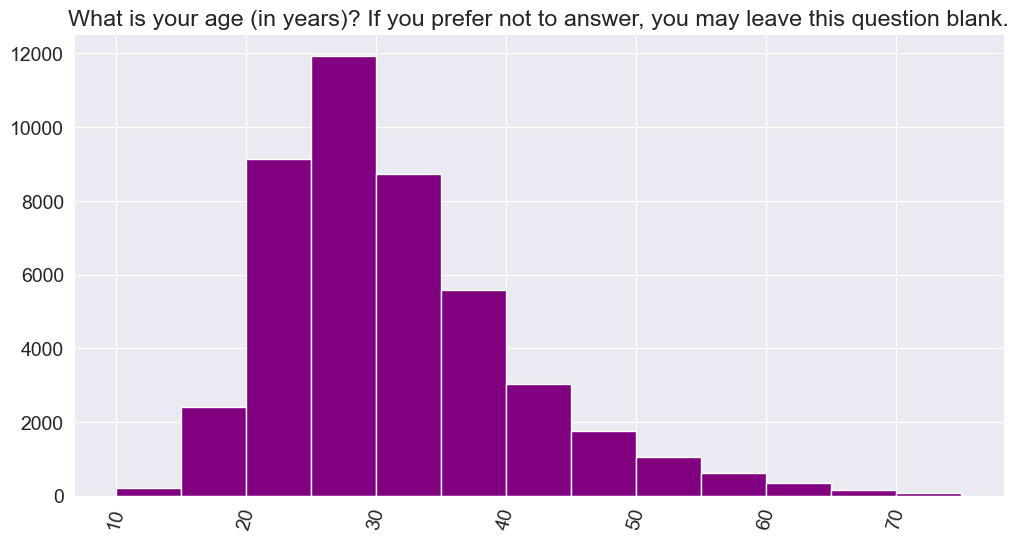

In [31]:
plt.figure(figsize=(12,6));
plt.xticks(rotation = 75);
plt.title(schema_df.Age);

fig = px.histogram(data_frame=survey_df, x= ['Age'], title=schema_df.Age)
fig.update_xaxes(tickvals = np.arange(10, 80, 5))
fig.show()
plt.hist(survey_df.Age, bins =np.arange(10, 80, 5), color ='purple');

In [32]:
conditions = [
    (survey_df['Age'] < 10),
    (survey_df['Age'] >= 10) & (survey_df['Age'] < 18),
    (survey_df['Age'] >= 18) & (survey_df['Age'] < 30),
    (survey_df['Age'] >= 30) & (survey_df['Age'] < 45),
    (survey_df['Age'] >= 45) & (survey_df['Age'] < 60)
]

# Corresponding labels for each condition
choices = [
    'Less than 10 years',
    '10-18 years',
    '18-30 years',
    '30-45 years',
    '45-60 years'
]

default = '60 years +'

# Create the new column using np.select
survey_df['AgeGroup'] = np.select(conditions, choices, default=default)

## 'which age group user fall into?'

In [33]:
ageGroup_counts = survey_df.AgeGroup.value_counts()
ageGroup_counts
schema_df['AgeGroup'] = 'In which group user fall into'

In [34]:
fig  = px.bar(data_frame=ageGroup_counts, x= ageGroup_counts.index, y= ageGroup_counts, title=schema_df.AgeGroup)
fig.show()

# Gender

In [38]:
schema_df.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [39]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Gender
Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [40]:
fig  = px.pie(data_frame=gender_counts, values = gender_counts, names=gender_counts.index, title=schema_df.Gender)
fig.show()

# Education level

In [41]:
survey_df.EdLevel

0        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2                                                    NaN
3        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)
                              ...                       
64456    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
64457                                                NaN
64458                          Primary/elementary school
64459                                                NaN
64460         Other doctoral degree (Ph.D., Ed.D., etc.)
Name: EdLevel, Length: 64306, dtype: object

In [42]:
schema_df.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

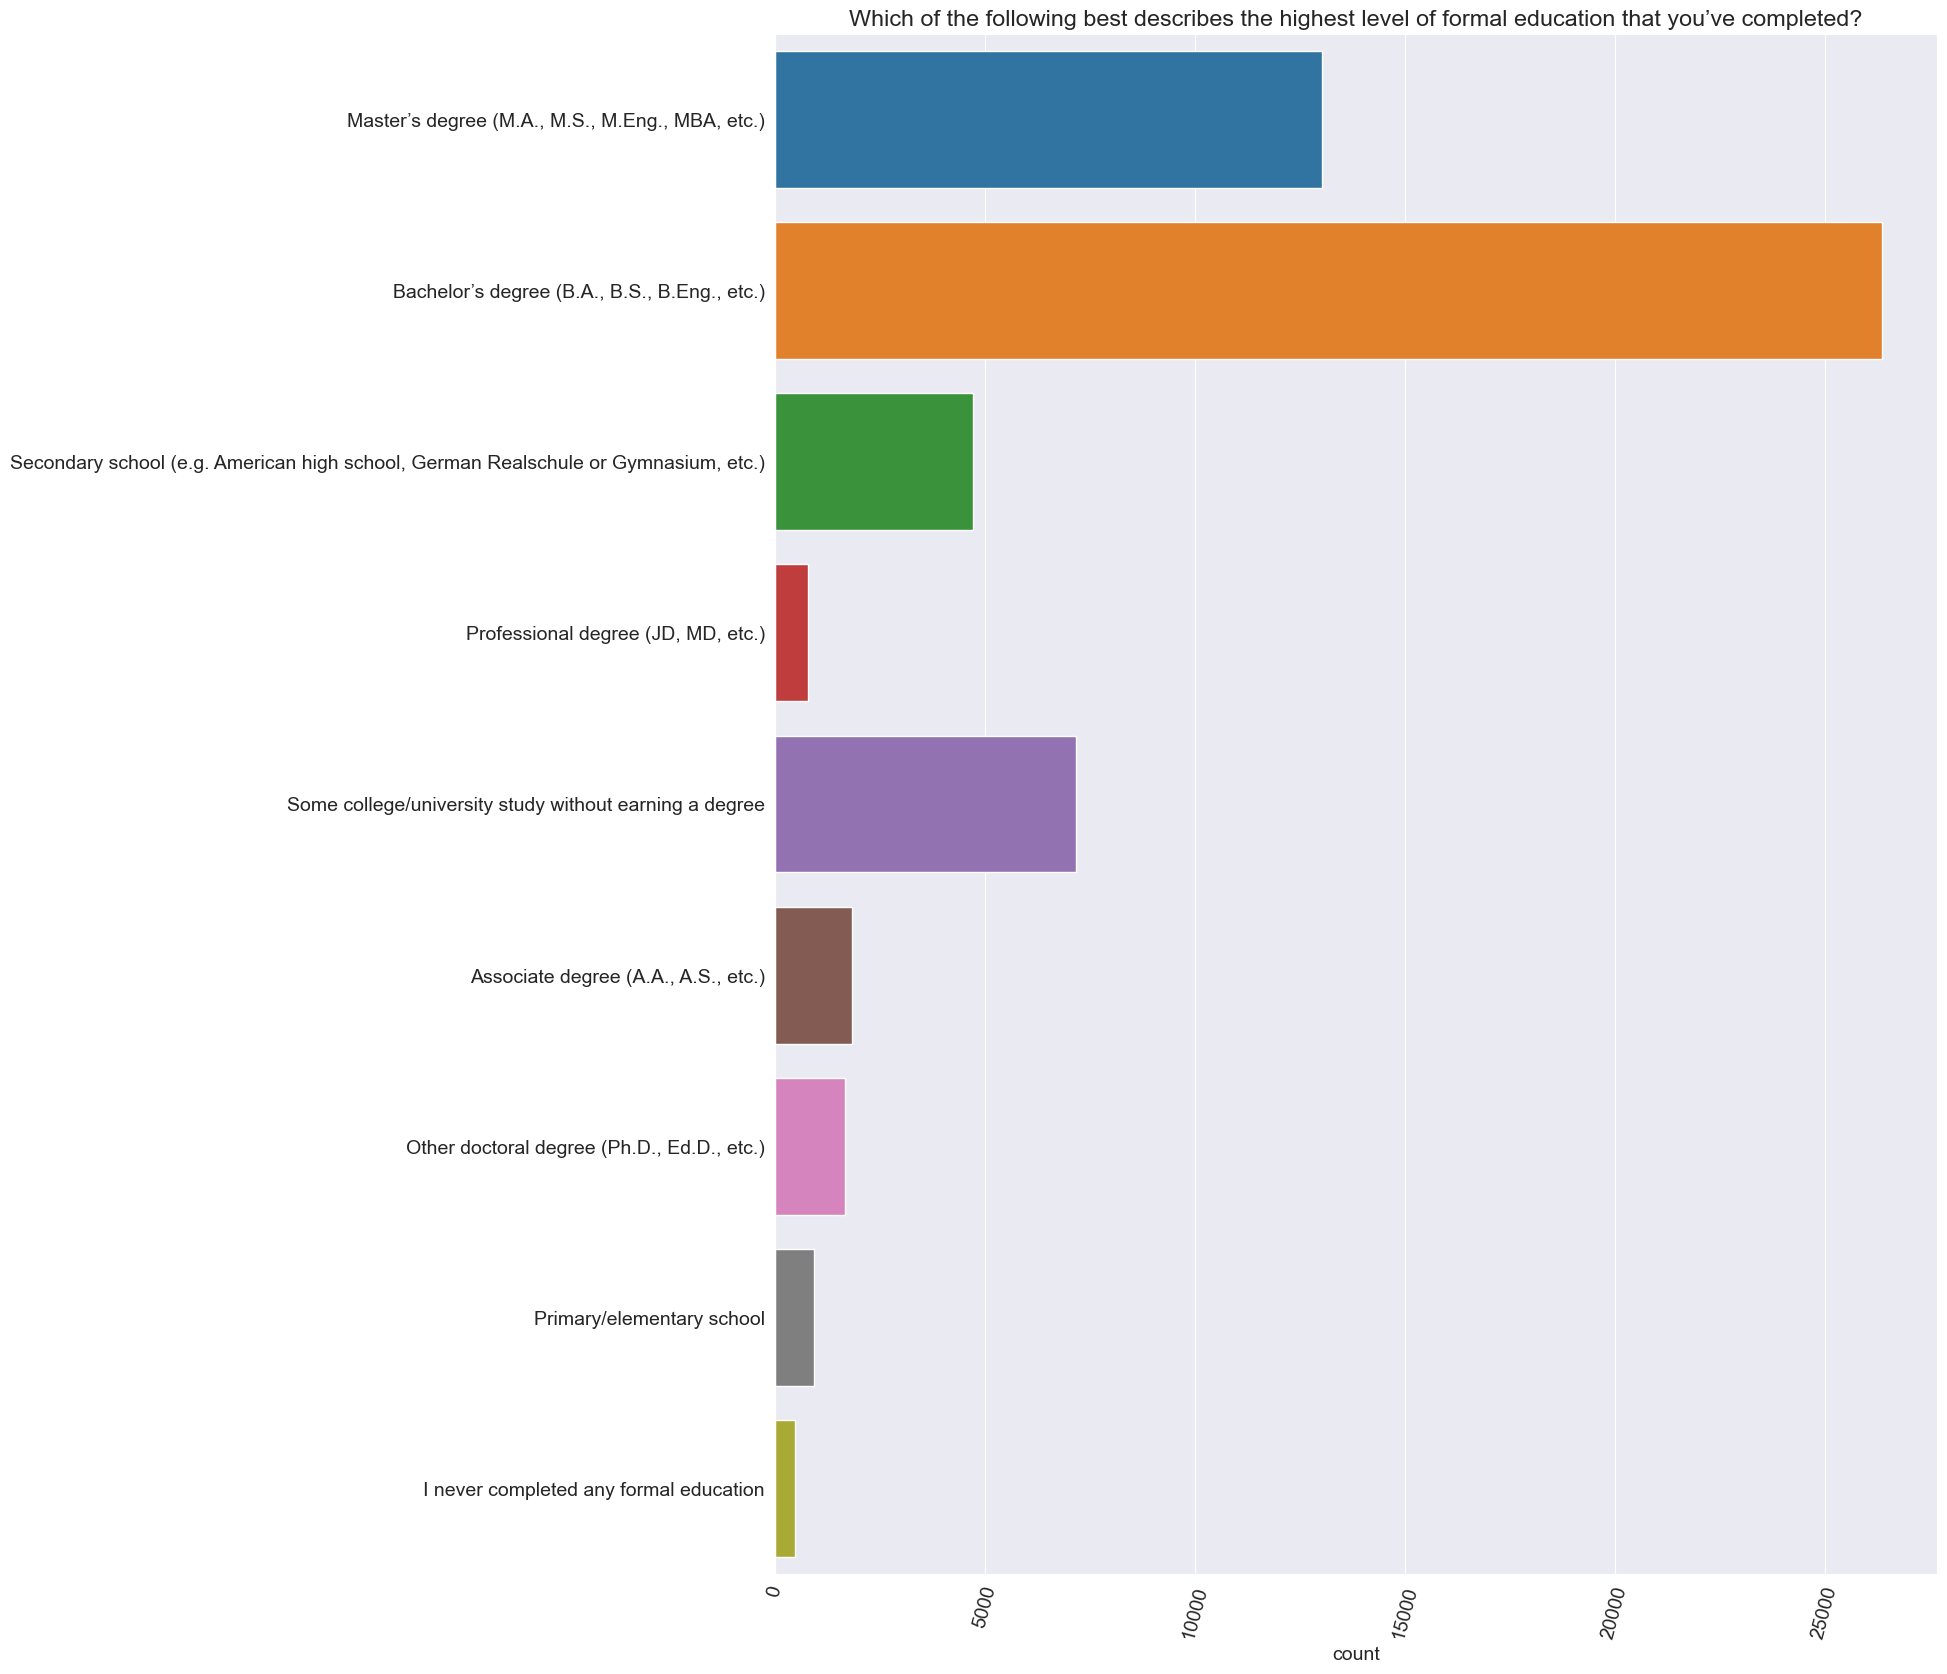

In [43]:
plt.figure(figsize=(15,20))
sns.countplot(y = survey_df.EdLevel, hue=survey_df.EdLevel, legend=False)
plt.title(schema_df.EdLevel);
plt.xticks(rotation= 75);
plt.ylabel(None);

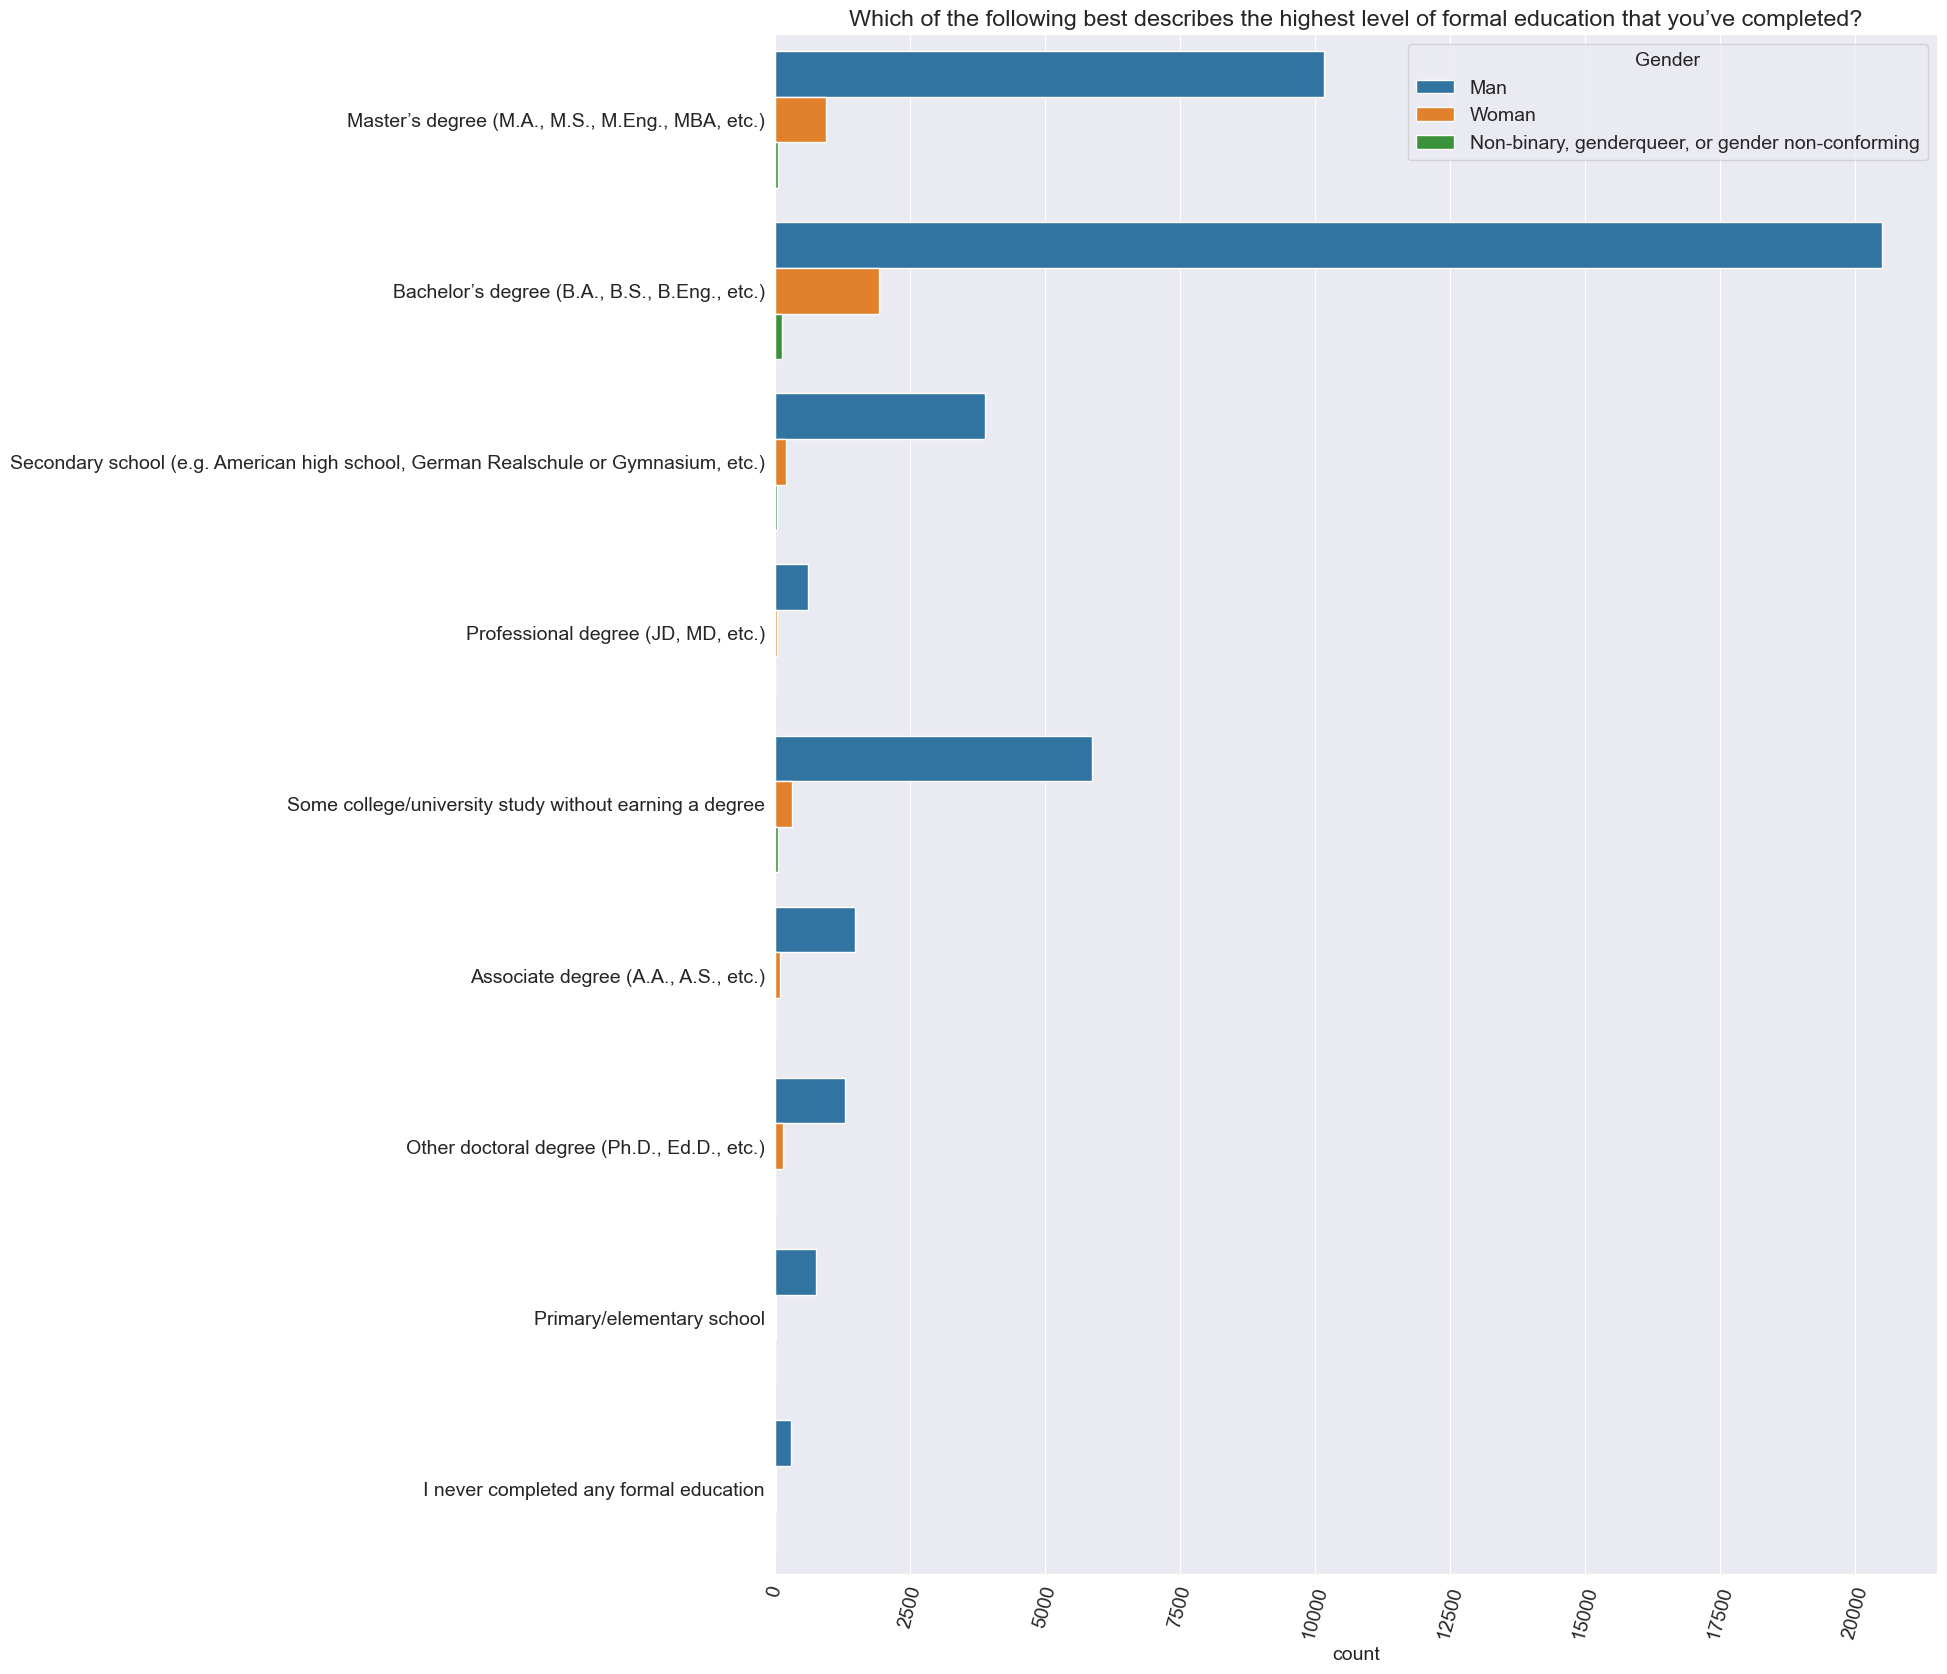

In [44]:
plt.figure(figsize=(15,20))
sns.countplot(y= survey_df.EdLevel, hue = survey_df.Gender)
plt.title(schema_df.EdLevel);
plt.xticks(rotation= 75);
plt.ylabel(None);

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          46.254014
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       22.856742
Some college/university study without earning a degree                                12.570857
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8.290483
Associate degree (A.A., A.S., etc.)                                                    3.213352
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2.950106
Primary/elementary school                                                              1.630368
Professional degree (JD, MD, etc.)                                                     1.391692
I never completed any formal education                                                 0.842386
Name: count, dtype: float64

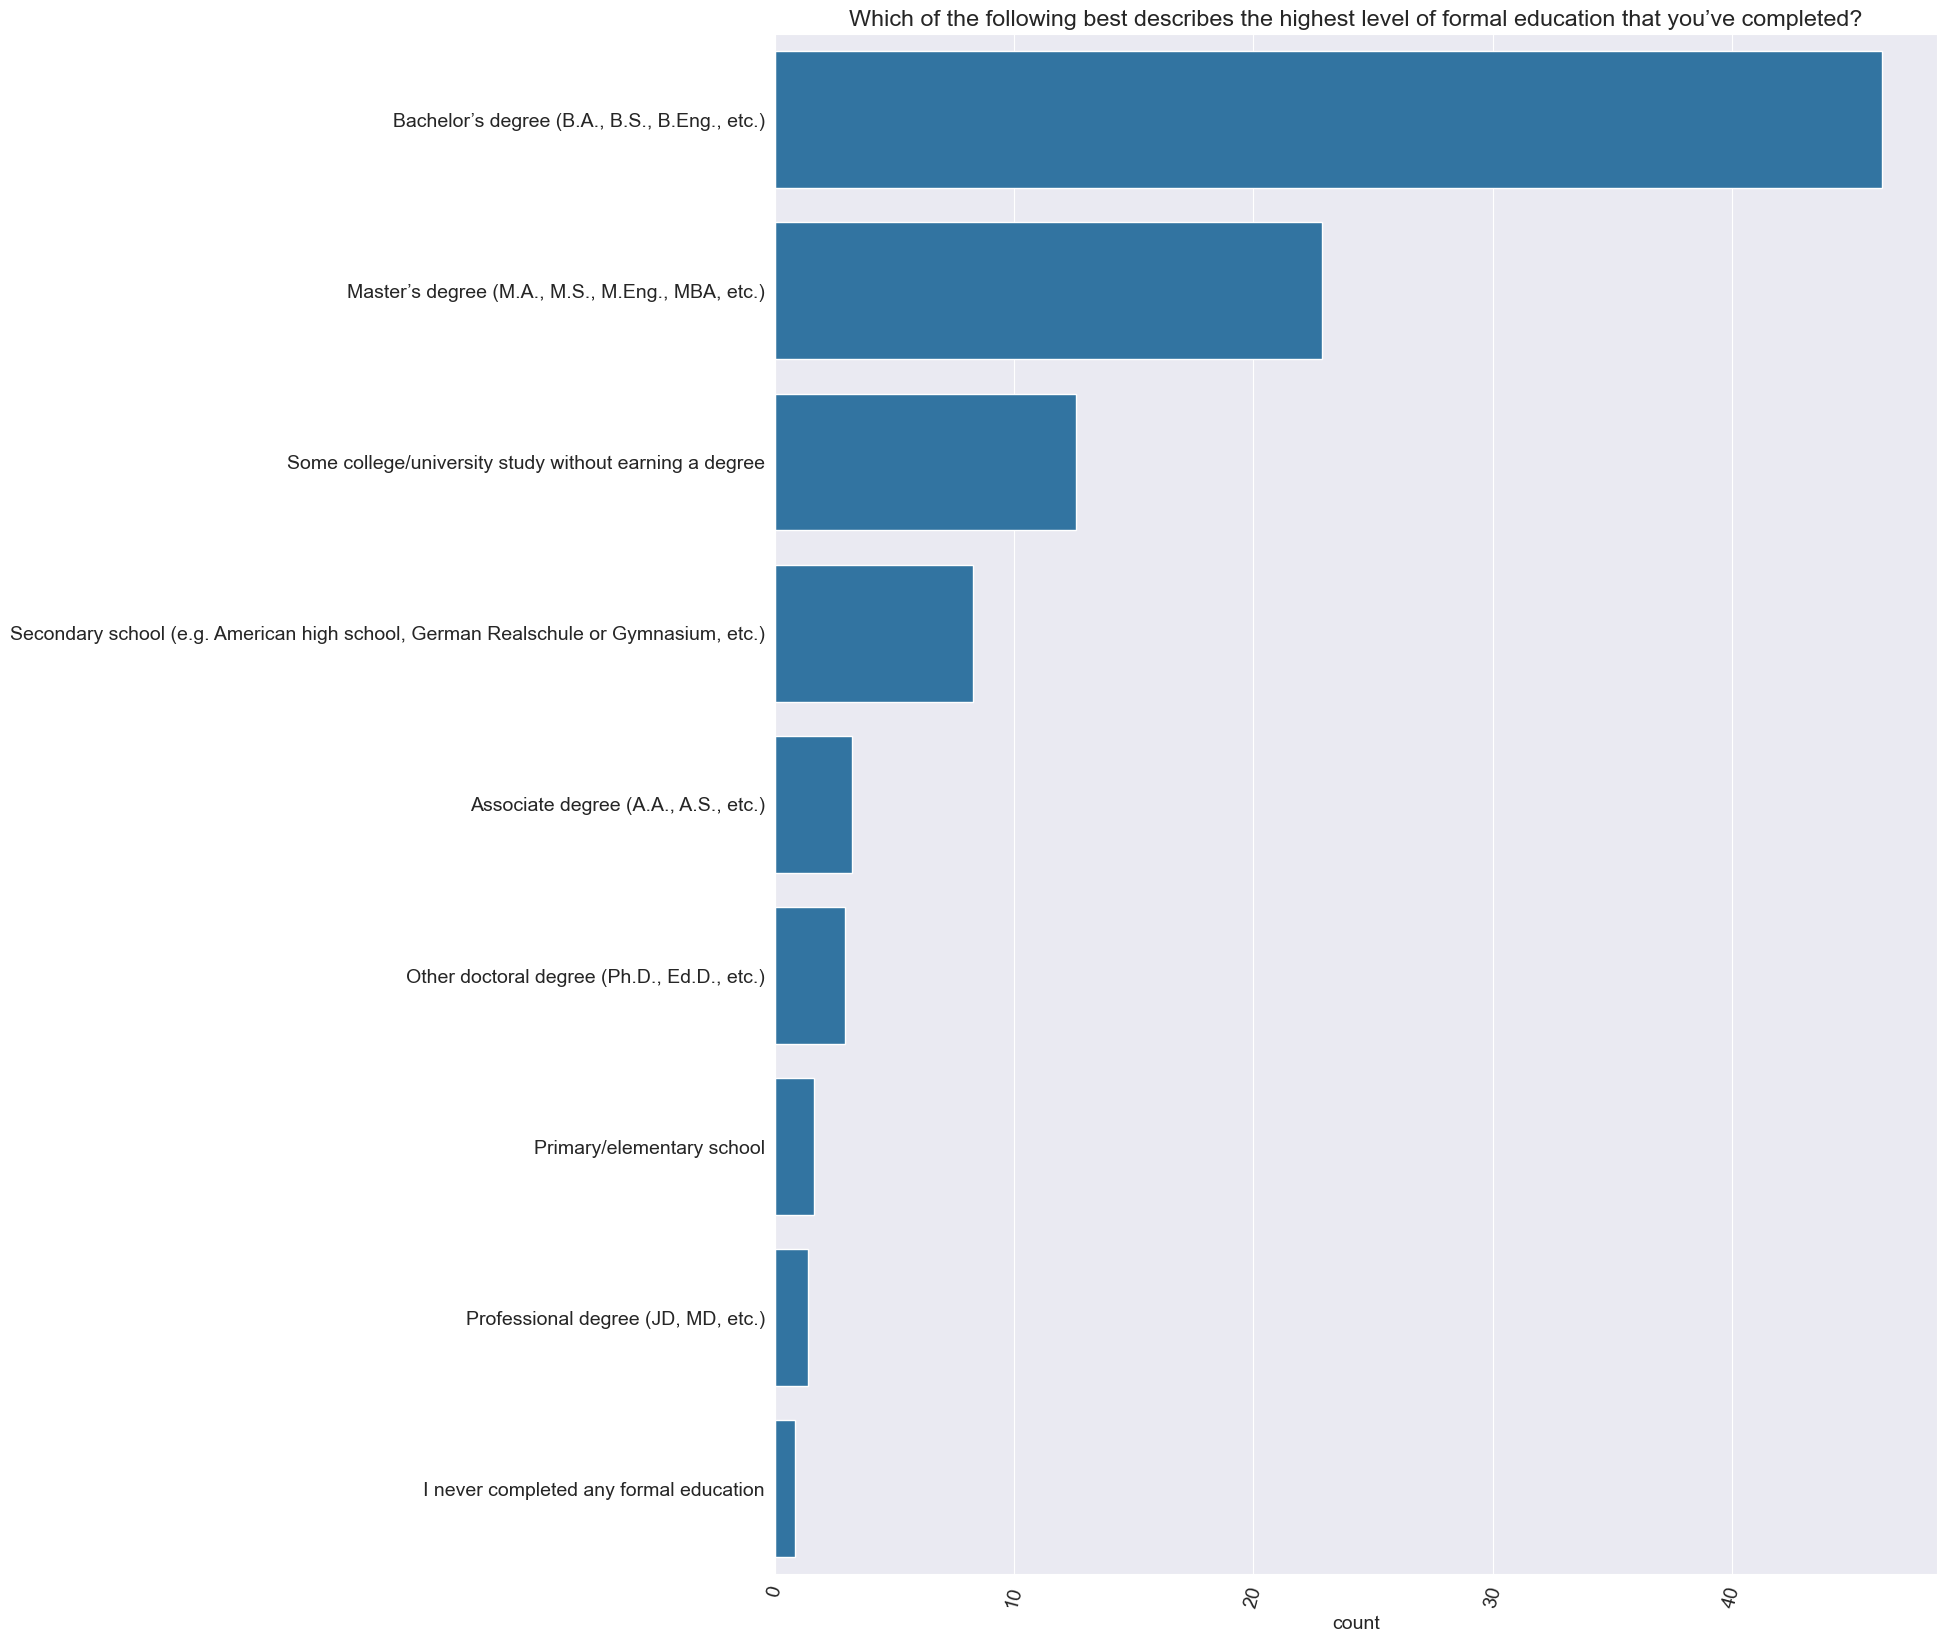

In [45]:
plt.figure(figsize=(15,20))
edlevel_pct = survey_df.EdLevel.value_counts()  * 100 / survey_df.EdLevel.count()
sns.barplot(x = edlevel_pct, y = edlevel_pct.index);
plt.title(schema_df.EdLevel);
plt.xticks(rotation= 75);
plt.ylabel(None);
edlevel_pct

In [46]:
schema_df.UndergradMajor

'What was your primary field of study?'

In [47]:
survey_df.UndergradMajor.unique()

array(['Computer science, computer engineering, or software engineering',
       nan, 'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

In [49]:
survey_df['HasCollegeDegree'] = np.where(survey_df['EdLevel'].str.contains('degree', case=False, na= False), 'Yes', 'No')
survey_df.HasCollegeDegree.unique()
survey_df.HasCollegeDegree

0        Yes
1        Yes
2         No
3        Yes
4        Yes
        ... 
64456    Yes
64457     No
64458     No
64459     No
64460    Yes
Name: HasCollegeDegree, Length: 64306, dtype: object

# Counting undergrad major

In [55]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()
undergrad_pct

UndergradMajor
Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                         

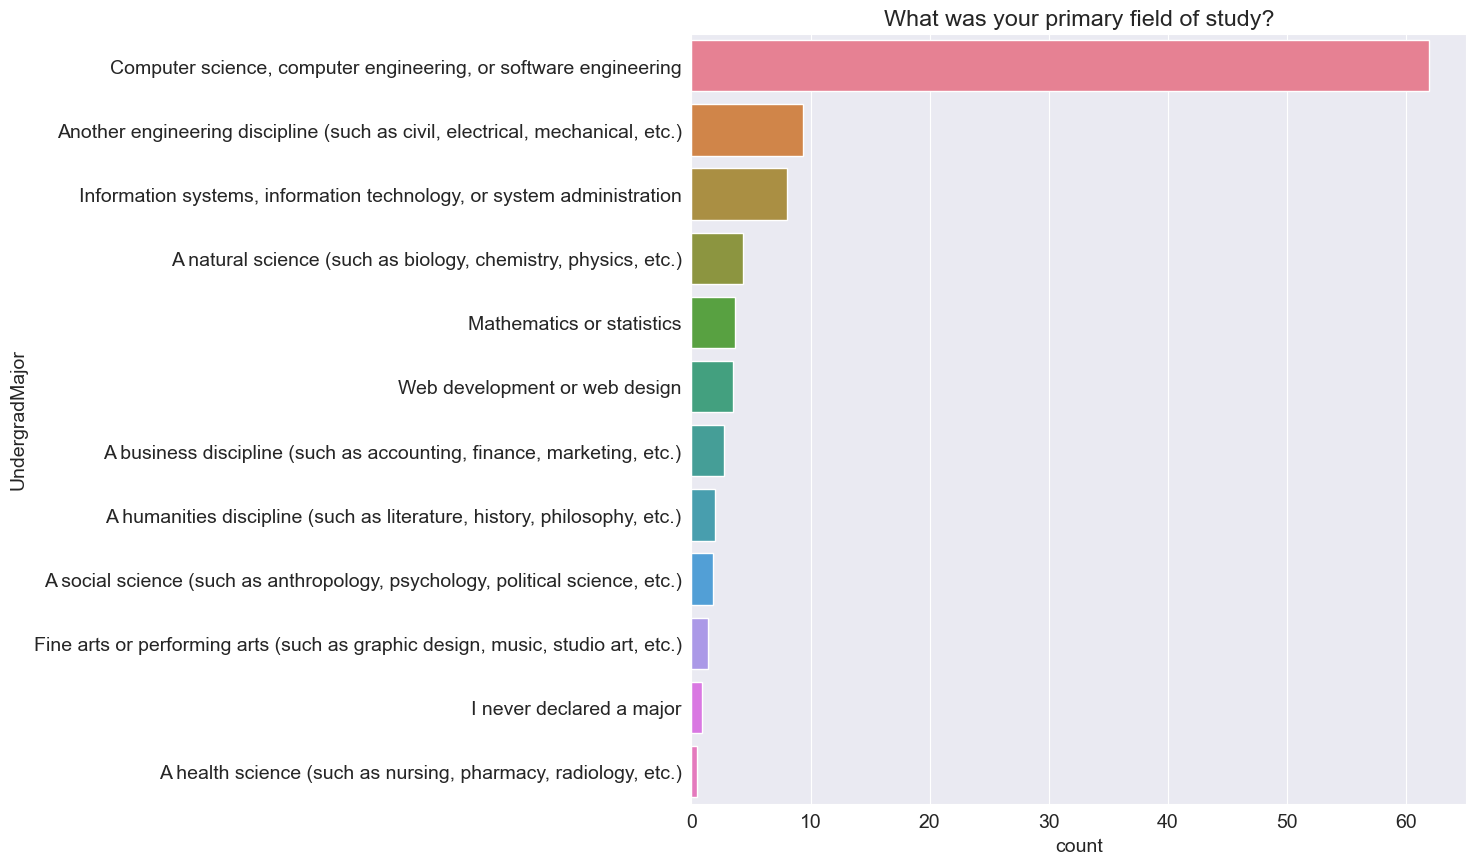

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(x= undergrad_pct, y= undergrad_pct.index, hue = undergrad_pct.index)
plt.title(schema_df.UndergradMajor);

In [57]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()
undergrad_pct['HasCollegeDegree'] = np.where(undergrad_pct.index.str.contains('degree', case=False, na= False), 'Yes', 'No')
undergrad_pct.drop('HasCollegeDegree')

UndergradMajor
Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)        1.82145
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                         

In [58]:
schema_df.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

# Employment

In [59]:
schema_df.Employment

'Which of the following best describes your current employment status?'

In [60]:
survey_df.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

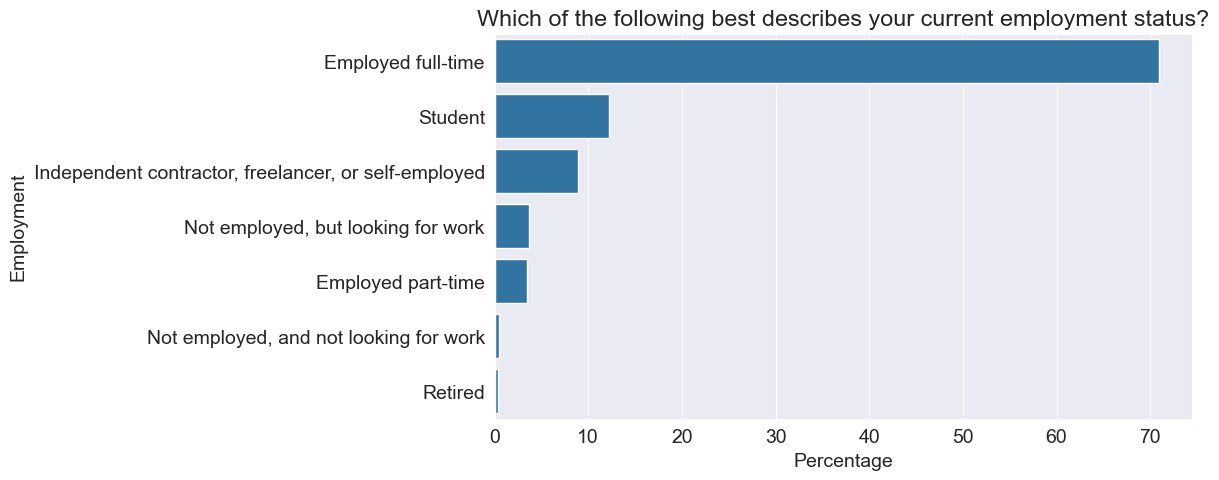

In [61]:
employment_pct = survey_df.Employment.value_counts() * 100 / survey_df.Employment.count()
sns.barplot(x= employment_pct, y= employment_pct.index)
plt.title(schema_df.Employment);
plt.xlabel('Percentage');

#fig = px.bar(employment_pct, x = employment_pct, y = employment_pct.index, title=schema_df.Employment)
#fig.update_layout(width = 650, height = 300)
#fig.show()

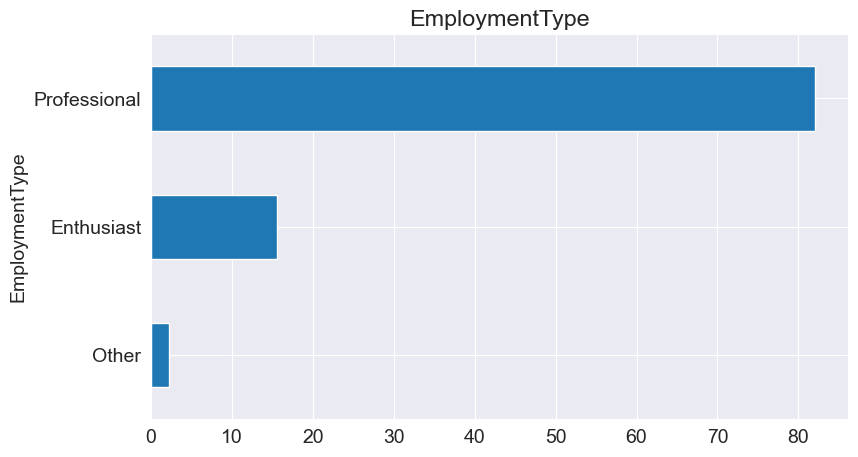

In [62]:
def categorize_emptype(emp):
    if not isinstance(emp, str):
        return 'Other'
    
    if any(x in emp for x in ['Student', 'Not employed, but looking for work']):
        return 'Enthusiast'
    elif any(x in emp for x in ['Independent contractor, freelancer, or self-employed', 'Employed full-time', 'Employed part-time']):
        return 'Professional'
    else:
        return 'Other'
    
survey_df['EmploymentType'] = survey_df['Employment'].apply(categorize_emptype)
(survey_df.EmploymentType.value_counts(normalize=True, ascending=True)*100).plot(kind = 'barh');
plt.title('EmploymentType');

# Development type

In [63]:
schema_df.DevType

'Which of the following describe you? Please select all that apply.'

In [64]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

Here we have some users who define their only one role but there are some users who define their roles with a lot of things they know so we are gonna make a data frame where we will include all the unique roles 

In [65]:
def split_multicolon(col_series):
    result_df = col_series.to_frame()
    options =[]
    
    for idx, value in col_series[col_series.notnull()].items():
        
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option]= False
            result_df.at[idx, option]= True
    return result_df[options]

In [66]:
devtype_df = split_multicolon(survey_df.DevType)

In [67]:
devtype_df

Developer, desktop or enterprise applications  Developer, full-stack  \
0                                               True                   True   
1                                              False                   True   
2                                              False                  False   
3                                              False                  False   
4                                              False                  False   
...                                              ...                    ...   
64456                                          False                  False   
64457                                          False                  False   
64458                                          False                  False   
64459                                          False                  False   
64460                                          False                  False   

       Developer, mobile  Designer  Developer, front-end  Developer, back-end  \
0                  False     False                 False                False   
1                   True     False                 False                False   
2                  False     False                 False                False   
3                  False     False                 False                False   
4                  False     False                 False                False   
...                  ...       ...                   ...                  ...   
64456              False     False                 False                False   
64457              False     False                 False                False   
64458              False     False                 False                False   
64459              False     False                 False                False   
64460              False     False                 False                False   

       Developer, QA or test  DevOps specialist  Developer, game or graphics  \
0                      False              False                        False   
1                      False              False                        False   
2                      False              False                        False   
3                      False              False                        False   
4                      False              False                        False   
...                      ...                ...                          ...   
64456                  False              False                        False   
64457                  False              False                        False   
64458                  False              False                        False   
64459                  False              False                        False   
64460                  False              False                        False   

       Database administrator  ...  System administrator  Engineering manager  \
0                       False  ...                 False                False   
1                       False  ...                 False                False   
2                       False  ...                 False                False   
3                       False  ...                 False                False   
4                       False  ...                 False                False   
...                       ...  ...                   ...                  ...   
64456                   False  ...                 False                False   
64457                   False  ...                 False                False   
64458                   False  ...                 False                False   
64459                   False  ...                 False                False   
64460                   False  ...                 False                False   

       Product manager  Data or business analyst  Academic researcher  \
0                False                     False                False   
1    

In [68]:
devtype_df_total = devtype_df.sum()
devtype_df_total

Developer, desktop or enterprise applications    11687
Developer, full-stack                            26915
Developer, mobile                                 9406
Designer                                          5262
Developer, front-end                             18128
Developer, back-end                              26996
Developer, QA or test                             3893
DevOps specialist                                 5915
Developer, game or graphics                       2751
Database administrator                            5658
Developer, embedded applications or devices       4701
Engineer, data                                    3700
Educator                                          2895
System administrator                              5185
Engineering manager                               2699
Product manager                                   2471
Data or business analyst                          3970
Academic researcher                               3502
Data scien

In [69]:
total_df = devtype_df_total.sort_values(ascending=False).reset_index().rename(columns={0:'Count', 'index': 'Roles'})
total_df.set_index('Roles')

Count
Roles                                               
Developer, back-end                            26996
Developer, full-stack                          26915
Developer, front-end                           18128
Developer, desktop or enterprise applications  11687
Developer, mobile                               9406
DevOps specialist                               5915
Database administrator                          5658
Designer                                        5262
System administrator                            5185
Developer, embedded applications or devices     4701
Data or business analyst                        3970
Data scientist or machine learning specialist   3939
Developer, QA or test                           3893
Engineer, data                                  3700
Academic researcher                             3502
Educator                                        2895
Developer, game or graphics                     2751
Engineering manager                             2699
Product manager                                 2471
Scientist                                       2060
Engineer, site reliability                      1921
Senior executive/VP                             1292
Marketing or sales professional                  625

# Developer Roles

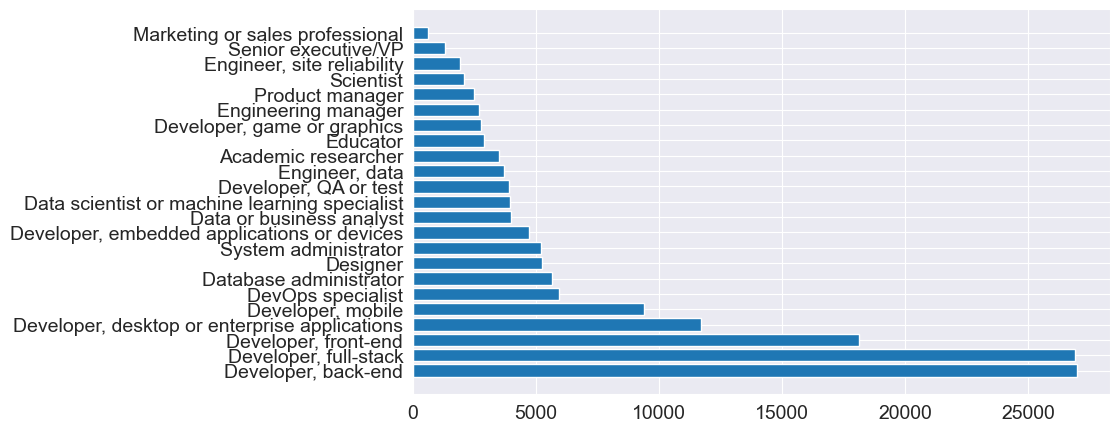

In [70]:
plt.barh(total_df['Roles'], total_df['Count']);

In [71]:
data_scientist_row = total_df.loc[total_df.Roles.str.strip().str.lower() == 'data scientist or machine learning specialist'.lower()]

# Language

In [72]:
language_df = split_multicolon(survey_df.LanguageWorkedWith)

In [73]:
language_df

C#  HTML/CSS  JavaScript  Swift  Objective-C  Python   Ruby    SQL  \
0       True      True        True  False        False   False  False  False   
1      False     False        True   True        False   False  False  False   
2      False     False       False   True         True    True  False  False   
3      False     False       False  False        False   False  False  False   
4      False      True       False  False        False   False   True   True   
...      ...       ...         ...    ...          ...     ...    ...    ...   
64456  False     False       False  False        False   False  False  False   
64457   True      True        True   True         True    True   True   True   
64458  False     False       False  False        False   False  False  False   
64459  False      True       False  False        False   False  False  False   
64460   True      True        True  False        False   False  False   True   

        Java    PHP  ...    VBA   Perl  Scala    C++     Go  Haskell   Rust  \
0      False  False  ...  False  False  False  False  False    False  False   
1      False  False  ...  False  False  False  False  False    False  False   
2      False  False  ...  False  False  False  False  False    False  False   
3      False  False  ...  False  False  False  False  False    False  False   
4      False  False  ...  False  False  False  False  False    False  False   
...      ...    ...  ...    ...    ...    ...    ...    ...      ...    ...   
64456  False  False  ...  False  False  False  False  False    False  False   
64457   True   True  ...   True   True   True   True   True     True   True   
64458  False  False  ...  False  False  False  False  False    False  False   
64459  False  False  ...  False  False  False  False  False    False  False   
64460   True  False  ...  False  False  False  False  False    False  False   

        Dart  Julia  Assembly  
0      False  False     False  
1      False  False     False  
2      False  False     False  
3      False  False     False  
4      False  False     False  
...      ...    ...       ...  
64456  False  False     False  
64457   True   True      True  
64458  False  False     False  
64459  False  False     False  
64460  False  False     False  

[64306 rows x 25 columns]

In [74]:
language_df_total = language_df.sum()
language_df_total

C#                       17879
HTML/CSS                 35884
JavaScript               38515
Swift                     3361
Objective-C               2317
Python                   25080
Ruby                      4006
SQL                      31153
Java                     22905
PHP                      14874
C                        12370
TypeScript               14444
Bash/Shell/PowerShell    18803
Kotlin                    4429
R                         3257
VBA                       3469
Perl                      1773
Scala                     2026
C++                      13578
Go                        4989
Haskell                   1197
Rust                      2893
Dart                      2262
Julia                      503
Assembly                  3503
dtype: int64

# Languages used by developers

In [78]:
#edlevel_pct = survey_df.EdLevel.value_counts()  * 100 / survey_df.EdLevel.count()
language_total = language_df_total.sort_values(ascending=False).reset_index().rename(columns = {'index': 'Languages', 0: 'Count' })
language_total.set_index('Languages')

language_percent = language_df.mean().sort_values(ascending = False) * 100
language_percent

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

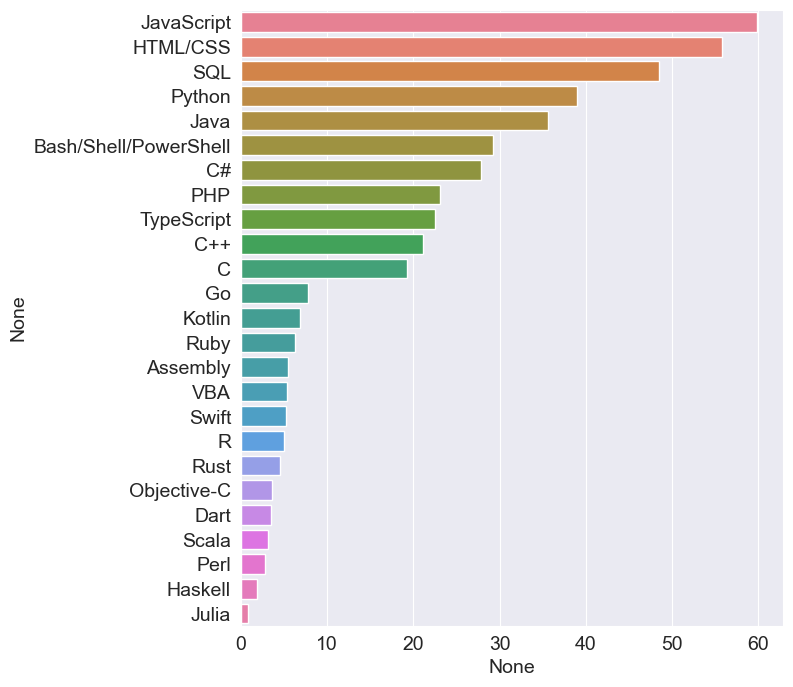

In [79]:
plt.figure(figsize=(7, 8))
sns.barplot(x = language_percent, y = language_percent.index, hue = language_percent.index);

Almost 60 % of the people uses Javascript

# Job satisfaction

In [80]:
jobsat_df= survey_df.groupby('JobSat')['HasCollegeDegree'].count().reset_index().rename(columns = { 0 :' counts'})
jobsat_df.set_index('JobSat')

HasCollegeDegree
JobSat                                              
Neither satisfied nor dissatisfied              5747
Slightly dissatisfied                           7070
Slightly satisfied                             13811
Very dissatisfied                               3705
Very satisfied                                 14502

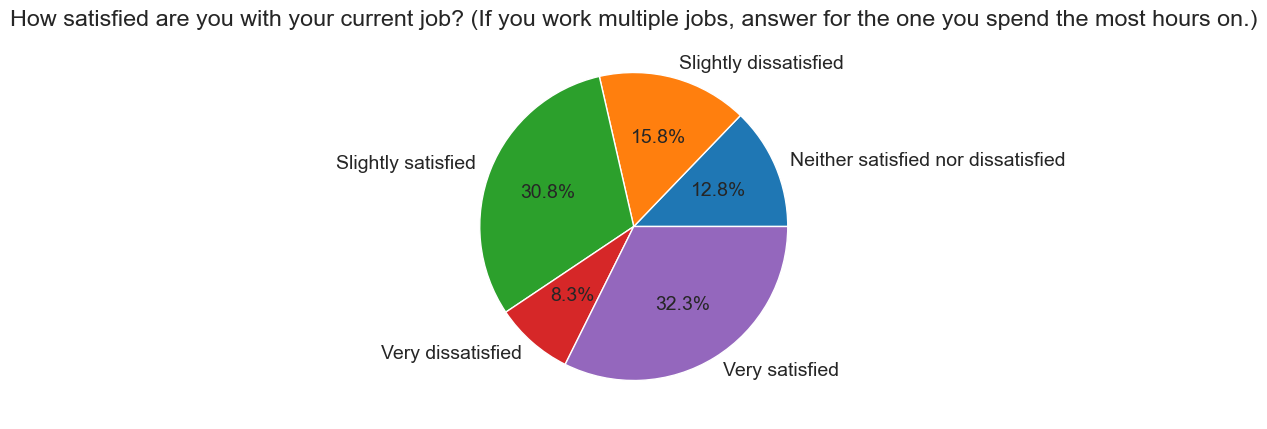

In [81]:
plt.pie (jobsat_df['HasCollegeDegree'], labels = jobsat_df['JobSat'], autopct = '%1.1f%%');
plt.title(schema_df.JobSat);

So from above pie chart we can say that only 1/3rd people are very satisfied with their job

# Languages used by student

In [110]:
student_raw_df = split_multicolon(survey_df[survey_df['Employment'] =='Student']['LanguageWorkedWith'])
student_raw_df

Bash/Shell/PowerShell      C  HTML/CSS   Java  Python    SQL     C#  \
14                      True   True      True   True    True   True  False   
20                      True  False      True   True   False   True   True   
27                     False  False     False  False    True  False  False   
28                     False  False      True  False    True  False   True   
39                     False   True      True  False    True   True   True   
...                      ...    ...       ...    ...     ...    ...    ...   
64421                  False   True      True   True    True   True   True   
64426                  False   True      True   True    True   True  False   
64441                  False   True     False   True   False  False   True   
64444                  False  False     False  False   False  False  False   
64454                  False  False     False  False   False  False  False   

       JavaScript  Objective-C  Scala  ...   Ruby  Julia  Assembly  Kotlin  \
14          False        False  False  ...  False  False     False   False   
20           True         True   True  ...  False  False     False   False   
27          False        False  False  ...  False  False     False   False   
28          False        False  False  ...  False  False     False   False   
39           True        False  False  ...  False  False     False   False   
...           ...          ...    ...  ...    ...    ...       ...     ...   
64421        True         True  False  ...   True  False      True    True   
64426       False        False  False  ...  False  False      True    True   
64441       False        False  False  ...  False  False     False   False   
64444       False        False  False  ...  False  False     False   False   
64454       False        False  False  ...  False  False     False   False   

          Go   Rust   Dart    VBA  Haskell   Perl  
14     False  False  False  False    False  False  
20     False  False  False  False    False  False  
27     False  False  False  False    False  False  
28     False  False  False  False    False  False  
39     False  False  False  False    False  False  
...      ...    ...    ...    ...      ...    ...  
64421   True  False  False   True    False   True  
64426  False   True   True  False    False  False  
64441  False  False  False  False    False  False  
64444  False  False  False  False    False  False  
64454  False  False  False  False    False  False  

[7734 rows x 25 columns]

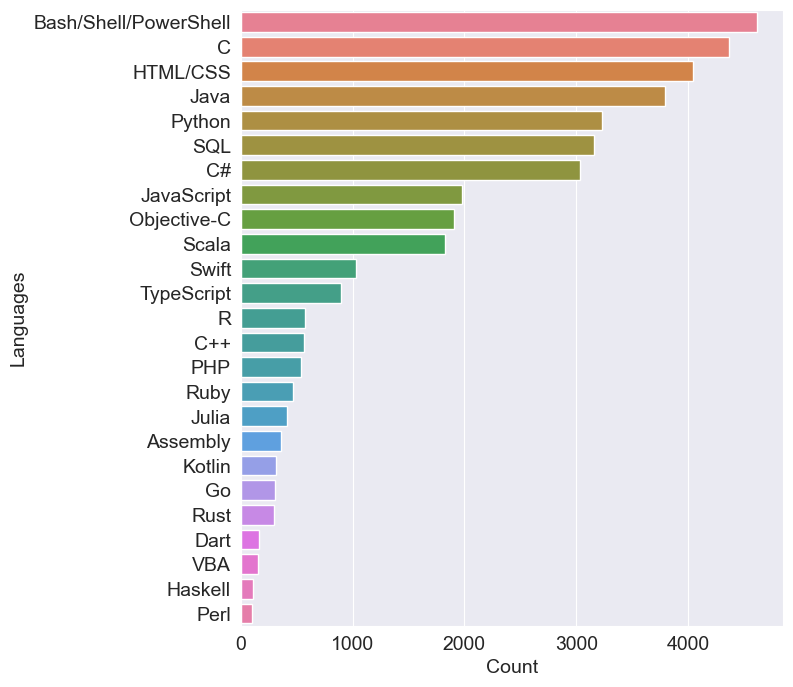

In [132]:
student_df = student_raw_df.sum()
student_df.sort_values(ascending=False)#.reset_index().rename(columns={ 'index' : 'Languages', 0: 'Count'})
plt.figure(figsize=(7, 8))
sns.barplot(x= student_df.sort_values(ascending=False), y = student_df.index, hue = student_df.index);
plt.xlabel('Count');
plt.ylabel('Languages');
#fig = px.bar(data_frame=student_df, x  = student_df.sort_values(ascending=False), y = student_df.index)
#fig.update_xaxes()
#fig.show()